In [38]:
import pandas as pd

In [39]:
import base64
import requests
import re, string, unicodedata

url = 'https://raw.githubusercontent.com/imamfirdaus-if/PembelajaranMesin/main/Quiz%202/Saham.txt'
txt = requests.get(url)
txt = txt.text
print(txt)

Saham (stock) merupakan salah satu instrumen pasar keuangan yang paling popular. Menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan. Pada sisi yang lain, saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik.

Saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak (badan usaha) dalam suatu perusahaan atau perseroan terbatas. Dengan menyertakan modal tersebut, maka pihak tersebut memiliki klaim atas pendapatan perusahaan, klaim atas asset perusahaan, dan berhak hadir dalam Rapat Umum Pemegang Saham (RUPS).

Keuntungan Saham
Pada dasarnya, ada dua keuntungan yang diperoleh investor dengan membeli atau memiliki saham

Dividen
Dividen merupakan pembagian keuntungan yang diberikan perusahaan dan berasal dari keuntungan yang dihasilkan perusahaan. Dividen diberikan setelah mendapat persetujuan dari pemegang saham dalam RUPS. Jika seorang pe

In [40]:
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    
    return str

In [41]:
clean_txt = cleaning(txt)

In [42]:
print(clean_txt)

saham stock merupakan salah satu instrumen pasar keuangan yang paling popular menerbitkan saham merupakan salah satu pilihan perusahaan ketika memutuskan untuk pendanaan perusahaan pada sisi yang lain saham merupakan instrument investasi yang banyak dipilih para investor karena saham mampu memberikan tingkat keuntungan yang menarik saham dapat didefinisikan sebagai tanda penyertaan modal seseorang atau pihak badan usaha dalam suatu perusahaan atau perseroan terbatas dengan menyertakan modal tersebut maka pihak tersebut memiliki klaim atas pendapatan perusahaan klaim atas asset perusahaan dan berhak hadir dalam rapat umum pemegang saham rups keuntungan saham pada dasarnya ada dua keuntungan yang diperoleh investor dengan membeli atau memiliki saham dividen dividen merupakan pembagian keuntungan yang diberikan perusahaan dan berasal dari keuntungan yang dihasilkan perusahaan dividen diberikan setelah mendapat persetujuan dari pemegang saham dalam rups jika seorang pemodal ingin mendapatk

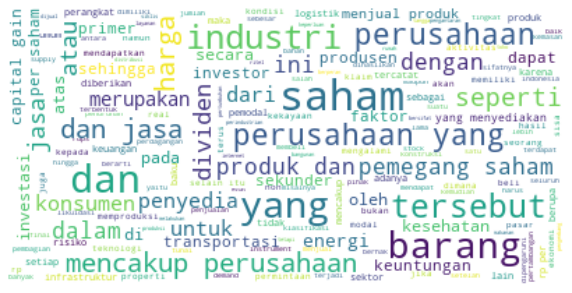

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=30, background_color="white").generate(clean_txt)
plt.figure(figsize=(10,8))

#plot wordcloud in matplotlib

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [44]:
words_in_article = clean_txt.split()

print(words_in_article)

['saham', 'stock', 'merupakan', 'salah', 'satu', 'instrumen', 'pasar', 'keuangan', 'yang', 'paling', 'popular', 'menerbitkan', 'saham', 'merupakan', 'salah', 'satu', 'pilihan', 'perusahaan', 'ketika', 'memutuskan', 'untuk', 'pendanaan', 'perusahaan', 'pada', 'sisi', 'yang', 'lain', 'saham', 'merupakan', 'instrument', 'investasi', 'yang', 'banyak', 'dipilih', 'para', 'investor', 'karena', 'saham', 'mampu', 'memberikan', 'tingkat', 'keuntungan', 'yang', 'menarik', 'saham', 'dapat', 'didefinisikan', 'sebagai', 'tanda', 'penyertaan', 'modal', 'seseorang', 'atau', 'pihak', 'badan', 'usaha', 'dalam', 'suatu', 'perusahaan', 'atau', 'perseroan', 'terbatas', 'dengan', 'menyertakan', 'modal', 'tersebut', 'maka', 'pihak', 'tersebut', 'memiliki', 'klaim', 'atas', 'pendapatan', 'perusahaan', 'klaim', 'atas', 'asset', 'perusahaan', 'dan', 'berhak', 'hadir', 'dalam', 'rapat', 'umum', 'pemegang', 'saham', 'rups', 'keuntungan', 'saham', 'pada', 'dasarnya', 'ada', 'dua', 'keuntungan', 'yang', 'diperoleh

In [45]:
import collections
import itertools

# Create counter
counts_no_urls = collections.Counter(words_in_article)

counts_no_urls.most_common(5)

[('dan', 50), ('perusahaan', 48), ('yang', 47), ('saham', 45), ('jasa', 25)]

In [46]:
df_txt = pd.DataFrame(counts_no_urls.most_common(15), columns=['words', 'count'])
df_txt.head()

,words,count
0,dan,50
1,perusahaan,48
2,yang,47
3,saham,45
4,jasa,25


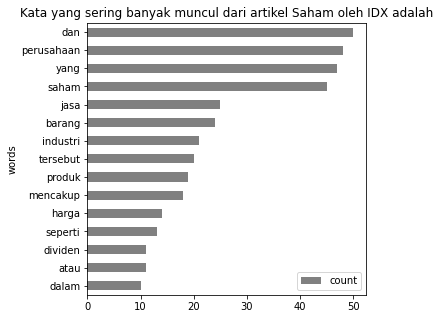

In [47]:
fig, ax = plt.subplots(figsize=(5, 5))

# Plot horizontal bar graph
df_txt.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="grey")

ax.set_title("Kata yang sering banyak muncul dari artikel Saham oleh IDX adalah")

plt.show()